In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
df = pd.read_csv("C:\\Users\\crisa\\Documents\\repositorios\\Proyecto_Final_MLOps\\Data\\PS_20174392719_1491204439457_log.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


1. Análisis descriptivo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
conteo=df["isFraud"].value_counts()
print(conteo)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


<Axes: title={'center': 'Operaciones fraudulentas vs o fraudelentas'}, xlabel='isFraud'>

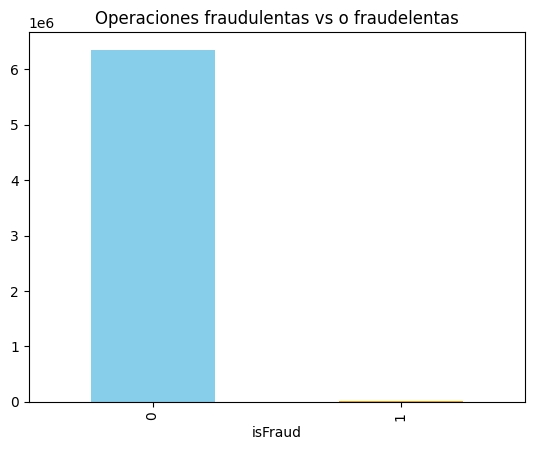

In [ ]:
df["isFraud"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Operaciones fraudulentas vs o fraudelentas")

Dataset está muy desbalanceado, en el preprocesamiento se harán los ajusntes necesarios.

2. Gráficos para variables categóricas

In [ ]:
import plotly
print(plotly.__version__) 

6.0.1


In [2]:
px.pie(df, names='type', title='Distribución de tipos de transacciones')

NameError: name 'px' is not defined

Fraude por tipo de transacción

In [ ]:
px.pie(df, x='type', color='isFraud', title='Fraude por tipo de transacción', barmode='group')

TypeError: pie() got an unexpected keyword argument 'x'

Distribución de montos

In [ ]:
px.histogram(df, x='amount', color='isFraud',title='Distribución de montos por fraude', nbins=50, log_y=True)

Diferencias de saldo antes y después de la transacción

In [ ]:
px.box(df, y='diffOrig', color='isFraud', title='Diferencia en origen vs fraude')

Correlaciones

In [ ]:
px.scatter(df, x='oldbalanceOrg', y='amount', color='isFraud', title='Monto vs saldo origen')

Transacciones fraudulentas según el monto 

In [ ]:
px.violin(df, y='amount', color='isFraud', box=True, log_y=True, title='Transacciones fraudulentas según el monto')